In [3]:
import pandas as pd
import geopandas as geopd
import seaborn as sns
import matplotlib.pyplot as plt

# Para que los gráficos se vean más lindes
sns.set_style()

# Cargo la data por países
data = pd.read_csv("../GlobalLandTemperaturesByCountry.csv")
data['year'] = pd.DatetimeIndex(data['dt']).year

# A partir del 1940 se estandizaron las mediciones, los datos están más prolijos
data = data[data['year'] >= 1940].dropna()

# Cambio nombre de algunos países para que coincida con el shapefile
data.replace(to_replace="Congo (Democratic Republic Of The)", value="Democratic Republic of the Congo", inplace=True)

<AxesSubplot:>

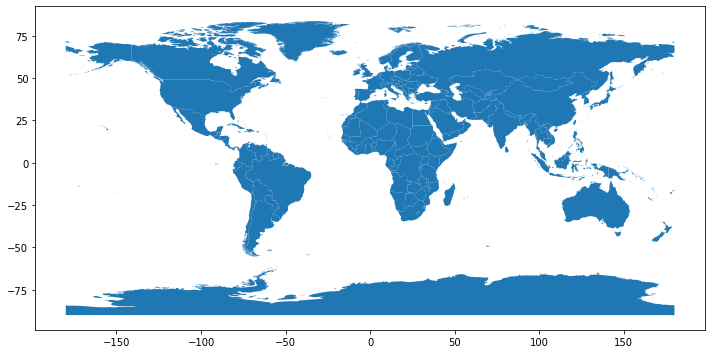

In [4]:
# Cargo la data geográfica
mundo = geopd.read_file("../World_Countries.shp")
mundo.plot(figsize=(12,7))

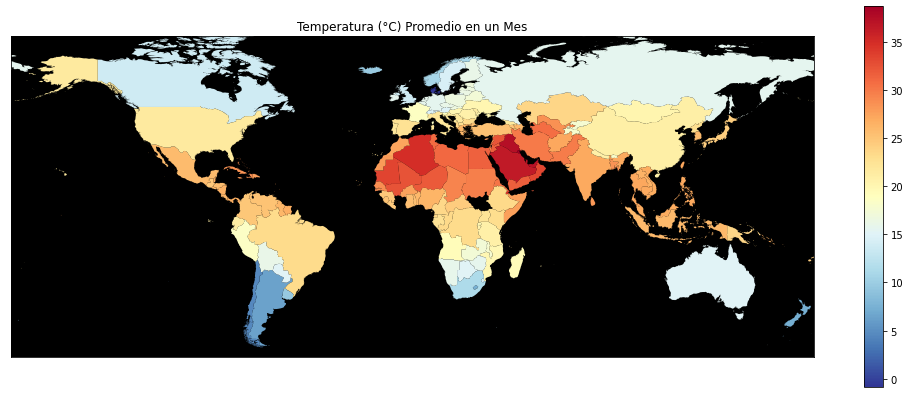

In [6]:
# Selecciono un mes para visualizar
data_mes = data[data['dt'] == '2000-07-01']

# Le agrego a la data geográfica las temperaturas de ese mes
mundo_mes = mundo.merge(data_mes, right_on = 'Country', left_on = 'COUNTRY')

# Y armamos el gráfico!
ax = mundo_mes.plot('AverageTemperature', cmap = 'RdYlBu_r', figsize=(18,7), legend=True)
ax.set_facecolor("black")
ax.set_xlim((-180,180))
ax.set_ylim((-60,80))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Temperatura (°C) Promedio en un Mes")
plt.show()